In [87]:
import pandas as pd
import numpy as np 

In [88]:
ship=pd.read_csv("titanicdataset.csv")

In [89]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

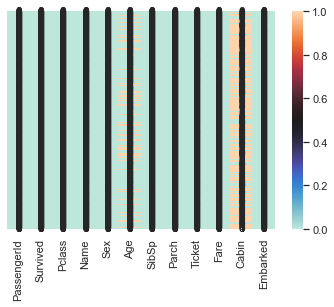

In [91]:
sns.heatmap(ship.isnull(),annot=True,yticklabels=False,cmap='icefire')

In [92]:
# from the above it is clear 85% is null values so it doesnt effect the survived so dropping cabin
ship.drop(columns='Cabin',inplace=True)

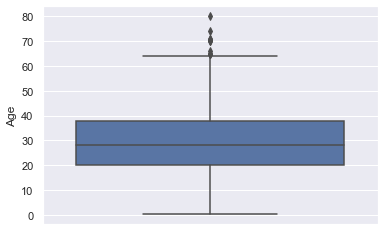

In [93]:
# the avg age is 28 so replacing it with nan values 
sns.boxplot(y='Age',data=ship)

In [94]:
ship['Age']=ship['Age'].replace(np.nan,30)

In [95]:
ship.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [96]:
ship['Embarked']=ship['Embarked'].replace(np.nan,'')

In [97]:
ship.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [98]:
# done with null values next vizualing the data with survived


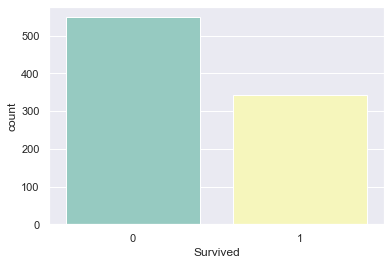

In [99]:
sns.set(style='darkgrid')
sns.countplot(x='Survived',data=ship,palette='Set3')

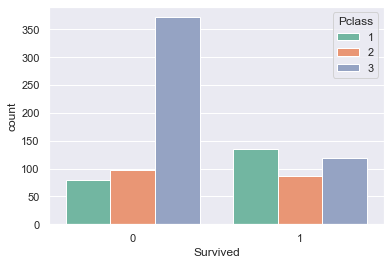

In [100]:
sns.countplot(x='Survived',data=ship,hue='Pclass',palette='Set2')

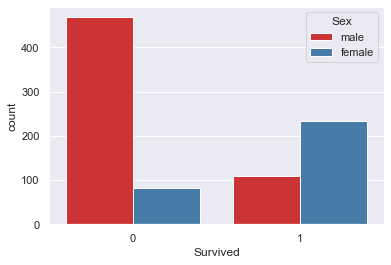

In [101]:
sns.countplot(x='Survived',data=ship,hue='Sex',palette='Set1')

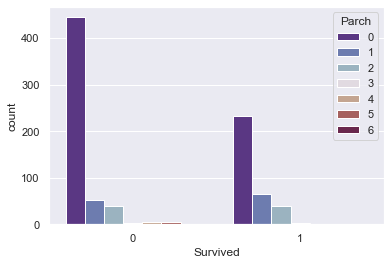

In [102]:
sns.countplot(x='Survived',data=ship,hue='Parch',palette='twilight_shifted')

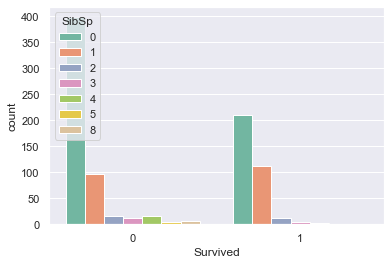

In [103]:
sns.countplot(x='Survived',data=ship,hue='SibSp',palette='Set2')

#From the above visualisontion we can observe that 


1.mostly of the members didnt survived around 350 members survived
2.p class tellus us 3rd class people died more and 1st class people survived more and 2nd class are equal in death and suvival ratio
3. sex tells us that female suvived more than male
4. sibsp,parch isnt affecting the suvival rate 




In [104]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [105]:
#converting sex,embarked using label encoder so that the data would be in same type 

In [106]:
import sklearn
from sklearn import preprocessing

In [107]:
l=preprocessing.LabelEncoder()

In [108]:
ship['Sex']=l.fit_transform(ship['Sex'])

In [109]:
ship['Embarked']=l.fit_transform(ship['Embarked'])

In [110]:
ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1


In [111]:
#I removed all unecesary columns like id, name ticket ,fare cause it isnt affecting the suvival rate

In [112]:
titanic=ship.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [113]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,3
1,1,1,0,38.0,1,0,1
2,1,3,0,26.0,0,0,3
3,1,1,0,35.0,1,0,3
4,0,3,1,35.0,0,0,3
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,3
887,1,1,0,19.0,0,0,3
888,0,3,0,30.0,1,2,3
889,1,1,1,26.0,0,0,1


In [114]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [115]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,2.529742
std,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,0.800254
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,2.000000
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,3.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.000000


In [116]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.070657,-0.035322,0.081629,-0.176509
Pclass,-0.338481,1.000000,0.131900,-0.329727,0.083081,0.018443,0.173511
Sex,-0.543351,0.131900,1.000000,0.084660,-0.114631,-0.245489,0.118492
Age,-0.070657,-0.329727,0.084660,1.000000,-0.232440,-0.180330,-0.040965
SibSp,-0.035322,0.083081,-0.114631,-0.232440,1.000000,0.414838,0.071480
Parch,0.081629,0.018443,-0.245489,-0.180330,0.414838,1.000000,0.043351
Embarked,-0.176509,0.173511,0.118492,-0.040965,0.071480,0.043351,1.000000


In [117]:
# checking for outlier 
import scipy
from scipy.stats import zscore

In [118]:
z_score=abs(zscore(titanic))
print(titanic.shape)
titanic_final=titanic.loc[(z_score<3).all(axis=1)]
print(titanic_final.shape)

(891, 7)
(837, 7)


In [119]:
titanic_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,3
1,1,1,0,38.0,1,0,1
2,1,3,0,26.0,0,0,3
3,1,1,0,35.0,1,0,3
4,0,3,1,35.0,0,0,3
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,3
887,1,1,0,19.0,0,0,3
888,0,3,0,30.0,1,2,3
889,1,1,1,26.0,0,0,1


In [120]:
# up to this point we removed the outliers
# next check the distribution and skewness so that to learn the model better way 

In [121]:
titanic_final.skew()

Survived    0.423263
Pclass     -0.575009
Sex        -0.640880
Age         0.298556
SibSp       2.008509
Parch       2.035415
Embarked   -1.215037
dtype: float64

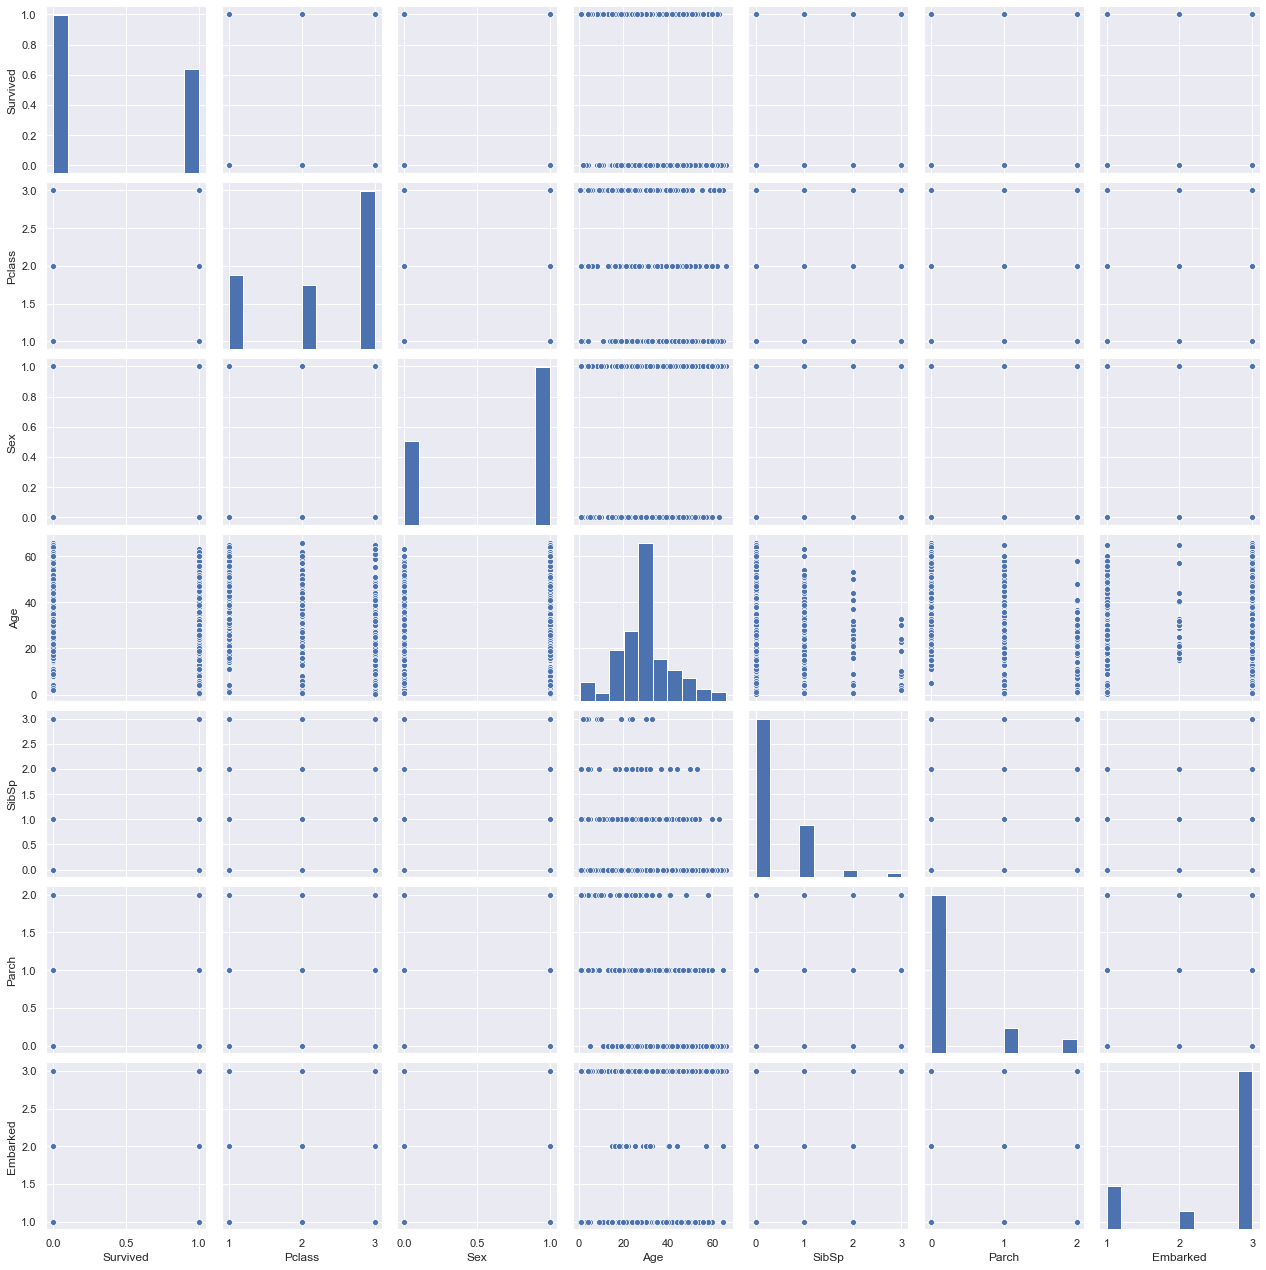

In [122]:
sns.pairplot(titanic_final)
plt.show()

In [123]:
# seperating the x and y 
df_x=titanic_final.drop(columns= ['Survived'])
y=titanic_final[['Survived']]

In [124]:
# now we are scaling the variables so that all have similar datatype
import sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [125]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.853602,0.730046,-0.646809,1.002994,-0.464376,0.597082
1,-1.531924,-1.369777,0.680981,1.002994,-0.464376,-1.895475
2,0.853602,-1.369777,-0.314861,-0.560332,-0.464376,0.597082
3,-1.531924,-1.369777,0.432020,1.002994,-0.464376,0.597082
4,0.853602,0.730046,0.432020,-0.560332,-0.464376,0.597082
...,...,...,...,...,...,...
832,-0.339161,0.730046,-0.231874,-0.560332,-0.464376,0.597082
833,-1.531924,-1.369777,-0.895769,-0.560332,-0.464376,0.597082
834,0.853602,-1.369777,0.017086,1.002994,2.975295,0.597082
835,-1.531924,0.730046,-0.314861,-0.560332,-0.464376,-1.895475


In [126]:
x.skew()

Pclass     -0.575009
Sex        -0.640880
Age         0.298556
SibSp       2.008509
Parch       2.035415
Embarked   -1.215037
dtype: float64

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=38,test_size=0.30)

In [138]:
from sklearn.linear_model import LogisticRegression


In [139]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Akhileshwar Reddy\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [140]:
predict=lg.predict(x_test)

In [141]:
predict

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [132]:
from sklearn.metrics import confusion_matrix

In [142]:
accuracy=confusion_matrix(y_test,predict)

In [143]:
accuracy

array([[132,  24],
       [ 26,  70]], dtype=int64)

In [135]:
from sklearn.metrics import accuracy_score

In [144]:
accuracy=accuracy_score(y_test,predict)
accuracy

0.8015873015873016

In [151]:
  import joblib

In [152]:
joblib.dump(lg,'Titanic.ipynb')

['Titanic.ipynb']

In [1]:
pwd

'C:\\Users\\Akhileshwar Reddy'